## Import Library

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sympy import symbols, Eq, solve

## Load and preview dataset

In [3]:
# Load and preview the dataset
df = pd.read_csv("iris.csv")
print("First five rows of the dataset:")
print(df.head())
print("\nDescriptive statistics:")
print(df.describe())

First five rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Descriptive statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5

## Selecting features and plotting histogram and boxplot

In [4]:
# Select numerical features excluding 'Id' column
df_numeric = df.select_dtypes(include=['number']).drop(columns=['Id'], errors='ignore')

<Figure size 1000x600 with 0 Axes>

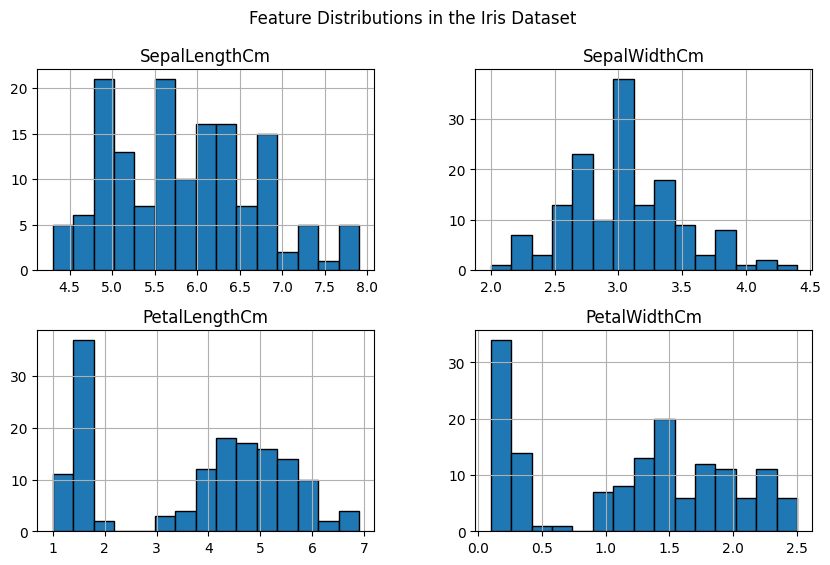

In [5]:
# Histogram visualization
plt.figure(figsize=(10, 6))
df_numeric.hist(figsize=(10, 6), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions in the Iris Dataset")
plt.show()

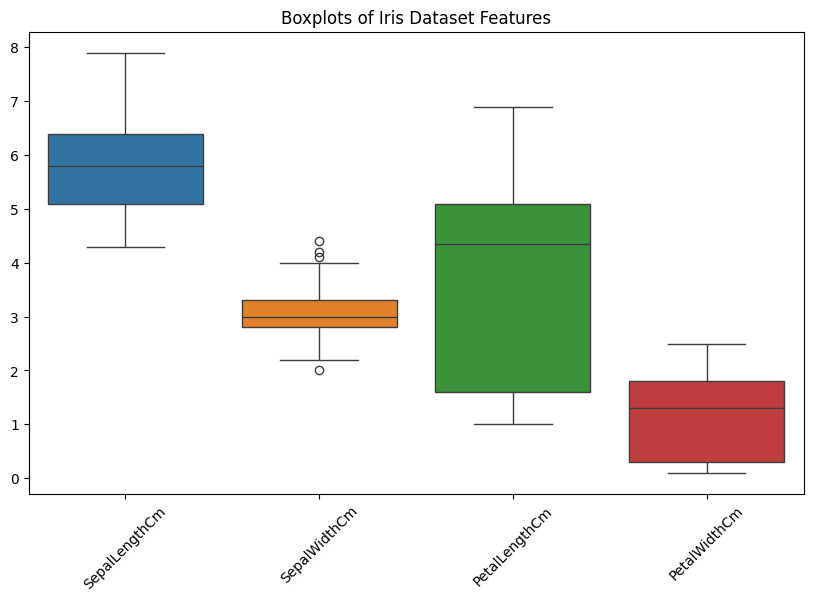

In [6]:

# Boxplot visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numeric)
plt.title("Boxplots of Iris Dataset Features")
plt.xticks(rotation=45)
plt.show()


In [7]:
# Correlation matrix computation and display
correlation_matrix = df_numeric.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


# Highlight strong correlations
- Strongest Correlations:")
- Petal Length & Petal Width: 0.96 (Very Strong Positive)
- Sepal Length & Petal Length: 0.87 (Strong Positive)
- Sepal Length & Petal Width: 0.82 (Strong Positive)

# Highlight weak or negative correlations
- Weak/Negative Correlations:
- Sepal Width & Petal Length: -0.42 (Moderate Negative)
- Sepal Width & Sepal Length: -0.11 (Weak Negative)

## Contingency Table and Probability Computation

In [10]:
# Contingency Table and Probability Computation
table = np.array([[30, 20], [50, 100]])
total = np.sum(table)
P_B = np.sum(table[:, 0]) / total
P_A = np.sum(table[0, :]) / total
P_A_given_B = table[0, 0] / np.sum(table[:, 0])
P_B_given_A = table[0, 0] / np.sum(table[0, :])

## Prediction for Spam Email

In [27]:
from sympy import symbols, Eq, solve

# Define symbols
P_Spam, P_NotSpam = 0.2, 0.8
P_Keyword_given_Spam, P_Keyword_given_NotSpam = 0.7, 0.1
P_Spam_given_Keyword = symbols("P_Spam_given_Keyword")

# Compute P(Keyword)
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_NotSpam * P_NotSpam)

# Apply Bayes' Theorem equation
eq = Eq(P_Spam_given_Keyword, (P_Keyword_given_Spam * P_Spam) / P_Keyword)

# Solve for P(Spam | Keyword)
result = solve(eq, P_Spam_given_Keyword)[0]

print("P(Spam | Keyword):", float(result))


P(Spam | Keyword): 0.6363636363636364


## Bayees Theorem

In [11]:
print("\nConditional Probabilities:")
print(f"P(A | B): {P_A_given_B:.2f}")
print(f"P(B | A): {P_B_given_A:.2f}")


Conditional Probabilities:
P(A | B): 0.38
P(B | A): 0.60


In [12]:
# Bayes' Theorem Computation
P_Spam, P_NotSpam = 0.2, 0.8
P_Keyword_given_Spam, P_Keyword_given_NotSpam = 0.7, 0.1
P_Spam_given_Keyword = symbols("P_Spam_given_Keyword")
P_Keyword = (P_Keyword_given_Spam * P_Spam) + (P_Keyword_given_NotSpam * P_NotSpam)
eq = Eq(P_Spam_given_Keyword, (P_Keyword_given_Spam * P_Spam) / P_Keyword)
result = solve(eq, P_Spam_given_Keyword)[0]

print("\nBayes' Theorem Result:")
print(f"P(Spam | Keyword): {float(result):.2f}")


Bayes' Theorem Result:
P(Spam | Keyword): 0.64
